# Entendimento dos dados - Drug Discovery

#### Foi proposto a análise de uma base de dados de amostras de culturas tratadas com diferentes drogas. Por rigor científico e estatístico esse tipo de análise é feito com grupos de controle e grupo de tratamento. 

Um grupo de controle científico permite o estudo experimental de uma variável por vez, e é parte vital do método científico. No desenho de experimentos, os tratamentos são aplicados a unidades experimentais em um grupo de tratamento.
 - Num experimento controlado e comparativo, dois experimentos idênticos são conduzidos. Em um deles, com o grupo controle, o fator testado não é aplicado – recebem um tratamento padrão, um placebo ou nenhum tratamento.
 - Em outro – o tratamento – o fator testado é aplicado.
 - Pode haver mais de um grupo de tratamento, mais de um grupo de controle ou ambos.

![grupo_controle](http://www.cepesp.io/uploads/2020/02/Captura-de-Tela-2020-02-13-a%CC%80s-16.57.38-1024x553.png)

#### Cada amostra é um compostos(pequenas moléculas) usado no tratamento dessas colônias de células

Tipos celulares:
 - g-0 a g-771
 - c-0 a c-99

# Aula 1 - Python, pandas e pharmacia

#### Análise de arquivos - Experimentos

In [1]:
import pandas as pd

link_dados_experimentos = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

df_experimentos = pd.read_csv(link_dados_experimentos, compression = 'zip')

In [3]:
df_experimentos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [12]:
df_experimentos.shape

(23814, 877)

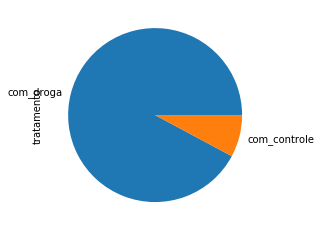

In [25]:
df_experimentos['tratamento'].value_counts(normalize=True).plot.pie()

In [27]:
df_experimentos['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

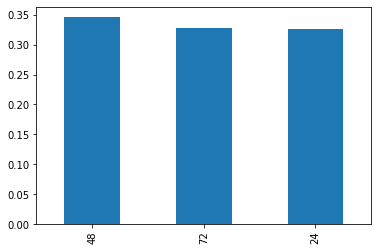

In [60]:
df_experimentos['tempo'].value_counts(normalize=True).plot.bar()

In [29]:
df_experimentos['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [58]:
df_experimentos['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

In [53]:
print('{} tipos de drogas diferentes'.format(len(df_experimentos['droga'].unique())))

3289 tipos de drogas diferentes


In [71]:
g_filter = df_experimentos['g-0'] > 0
df_experimentos[g_filter].count()

id            11769
tratamento    11769
tempo         11769
dose          11769
droga         11769
              ...  
c-95          11769
c-96          11769
c-97          11769
c-98          11769
c-99          11769
Length: 877, dtype: int64

#### Análise de dados - Resultados

In [2]:
link_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

df_resultados = pd.read_csv(link_resultados)

In [123]:
df_resultados.describe().T

,count,mean,std,min,25%,50%,75%,max
5-alpha_reductase_inhibitor,23814.0,0.000714,0.026709,0.0,0.0,0.0,0.0,1.0
11-beta-hsd1_inhibitor,23814.0,0.000756,0.027483,0.0,0.0,0.0,0.0,1.0
acat_inhibitor,23814.0,0.001008,0.031731,0.0,0.0,0.0,0.0,1.0
acetylcholine_receptor_agonist,23814.0,0.007979,0.088967,0.0,0.0,0.0,0.0,1.0
acetylcholine_receptor_antagonist,23814.0,0.012640,0.111716,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
ubiquitin_specific_protease_inhibitor,23814.0,0.000252,0.015871,0.0,0.0,0.0,0.0,1.0
vegfr_inhibitor,23814.0,0.007139,0.084190,0.0,0.0,0.0,0.0,1.0
vitamin_b,23814.0,0.001092,0.033025,0.0,0.0,0.0,0.0,1.0
vitamin_d_receptor_agonist,23814.0,0.001638,0.040436,0.0,0.0,0.0,0.0,1.0


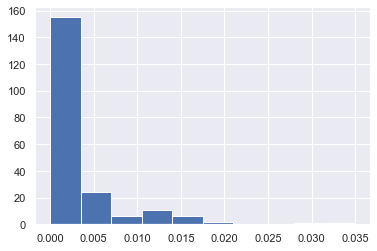

In [124]:
df_resultados.describe().T['mean'].hist()

#### Desafios - Aula 1

1 - pq classe tratamento é tao desbalanceada

2- plotar ultimas 5 linhas 

3 - proporção das classes de tratamento

4- qts tipos de drogas foram investigados

5 - usar método query

6 - renomear colunas tirando hifen

7 - deixar gráficos bonitos

8 - resumo do que aprendeu com os dados

# Aula 2 - Estatistica, dados e distribuições

In [95]:
#g-0 a g-771
#c-0 a c-99
df_experimentos.columns[778]
#mapa = {'droga':'composto'}
#df_experimentos.rename(columns=mapa, inplace=True)

'c-1'

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
index_droga = df_experimentos['droga'].value_counts().index[0:5]

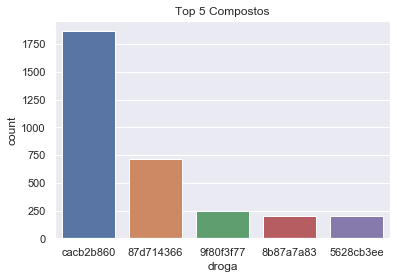

In [115]:
sns.set()
ax = sns.countplot(x = 'droga', data=df_experimentos.query('droga in @index_droga'), order = index_droga)
ax.set_title('Top 5 Compostos')
plt.show()

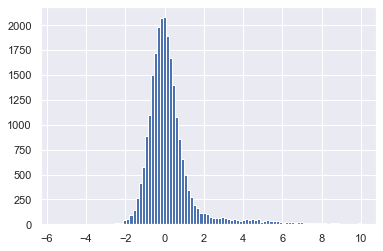

In [120]:
 df_experimentos['g-0'].hist(bins = 100);

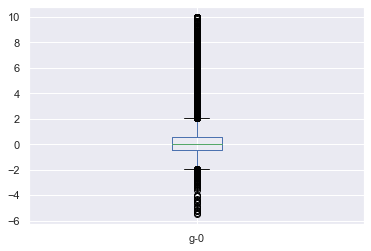

In [119]:
 df_experimentos['g-0'].plot.box()

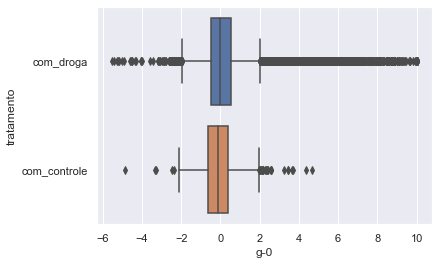

In [128]:
sns.boxplot(x = 'g-0', y = 'tratamento', data = df_experimentos);

#### Desafios - Aula 2

1- ordenar o countPlot

2- mudar detalhes estéticos

3- plotar histogramas

4- estudar estatisticas

5 - refletir sobre manipulação dos graficos("distorções")

6 - outros boxplots e comparação entre features

7- resumo e o que aprendeu dos dados

# Aula 3 - Correlações e causalidade

In [4]:
pd.crosstab([df_experimentos['dose'], df_experimentos['tempo']], df_experimentos['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [7]:
pd.crosstab([df_experimentos['dose'], df_experimentos['tempo']], df_experimentos['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [8]:
pd.crosstab([df_experimentos['dose'], df_experimentos['tempo']], df_experimentos['tratamento'], normalize = True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [9]:
pd.crosstab([df_experimentos['dose'], df_experimentos['tempo']], df_experimentos['tratamento'], values=df_experimentos['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

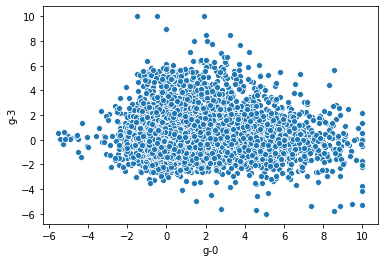

In [12]:
sns.scatterplot(x='g-0', y='g-3', data=df_experimentos)

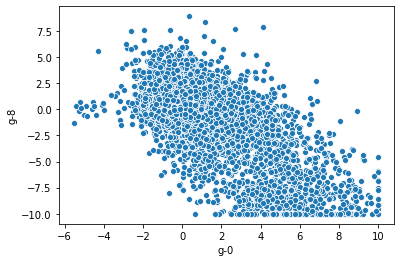

In [16]:
sns.scatterplot(x='g-0', y='g-8', data=df_experimentos)

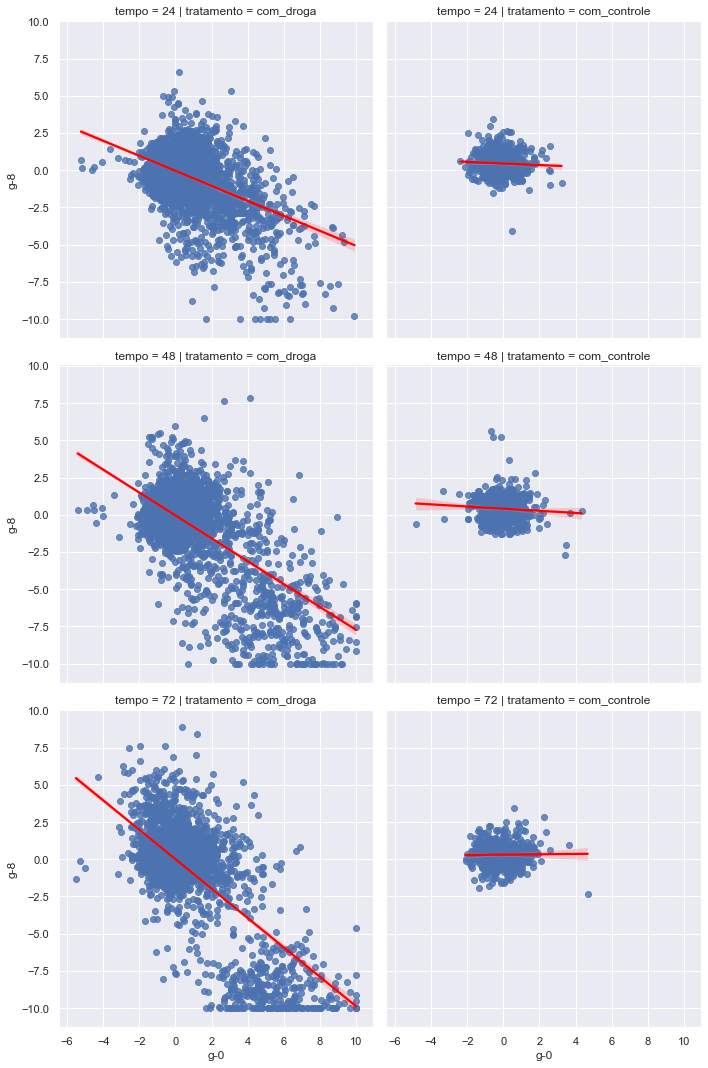

In [21]:
sns.set()
sns.lmplot(data=df_experimentos, x='g-0', y='g-8', line_kws={'color':'red'}, col='tratamento', row='tempo')

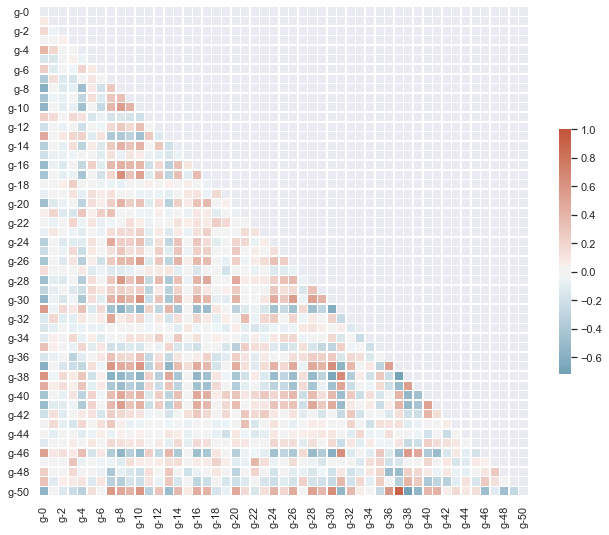

In [31]:
import numpy as np
corr = df_experimentos.loc[:,'g-0':'g-50'].corr()

mask = np.triu(np.ones_like(corr,dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, 
            square=True,linewidths=.5, cbar_kws={'shrink': .5})

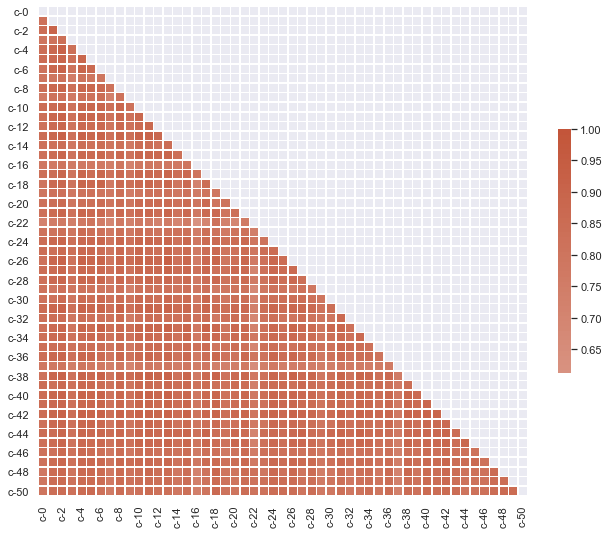

In [32]:
import numpy as np
corr = df_experimentos.loc[:,'c-0':'c-50'].corr()

mask = np.triu(np.ones_like(corr,dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, 
            square=True,linewidths=.5, cbar_kws={'shrink': .5})

### Desafios 3

1 - utilizar groupby para encontrar info semelhante ao crosstab

2 - Usar outros agregadores (não só mean).

3 - Explorar função 'melt'

4 - correlação entre genes e células

# Aula 4 - Merge e Análise de resultados

In [82]:
link_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

df_resultados = pd.read_csv(link_resultados)

In [34]:
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_resultados.columns

Index(['id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       'trpv_agonist', 'trpv_antagonist', 'tubulin_inhibitor',
       'tyrosine_kinase_inhibitor', 'ubiquitin_specific_protease_inhibitor',
       'vegfr_inhibitor', 'vitamin_b', 'vitamin_d_receptor_agonist',
       'wnt_inhibitor', 'drug_id'],
      dtype='object', length=208)

In [35]:
def get_drug_id(linha):
    id_name = linha['id']
    return id_name.replace('id_','')

In [67]:
def check_drug_action(columns):
    action_list = []
    for i in columns:
        aux = i.split('_')
        action_list.append(aux[-1])
    return action_list

In [36]:
df_resultados['drug_id'] = df_resultados.apply(get_drug_id, axis=1)

In [46]:
df_resultados['11-beta-hsd1_inhibitor'].unique()

array([0, 1], dtype=int64)

In [50]:
contagem = df_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
contagem

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [68]:
action_list = check_drug_action(df_resultados.columns)

In [83]:
df_resultados['n_moa'] = df_resultados.drop('id', axis=1).sum(axis=1)

In [84]:
#df_experimentos
df_resultados['ativo_moa'] = (df_resultados['n_moa'] != 0)
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [87]:
dados_combinados = pd.merge(df_experimentos, df_resultados[['id', 'n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [89]:
dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [90]:
dados_combinados['eh_controle'] = (dados_combinados['tratamento'] != 'com_droga')

In [95]:
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle,Eh_24h,Eh_48h,Eh_72h
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,1,True,False,True,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,False,False,False,False,True
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,False,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,False,True,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,False,False,True


In [94]:
dados_combinados['Eh_24h'] = (dados_combinados['tempo'] == 24)
dados_combinados['Eh_48h'] = (dados_combinados['tempo'] == 48)
dados_combinados['Eh_72h'] = (dados_combinados['tempo'] == 72)

In [97]:
dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts(normalize=True)

True     0.658238
False    0.341762
Name: ativo_moa, dtype: float64

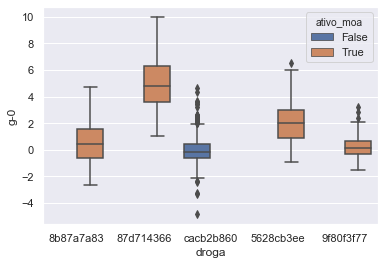

In [104]:
compostos = dados_combinados['droga'].value_counts().index[:5]
sns.boxplot(data = dados_combinados.query('droga in @compostos'), y='g-0', x='droga', hue='ativo_moa')

### Desafio 4

1 - Encontrar top 10 das ações(inibidor, agonista...)

# Aula 5 - Machine Learning e Scikit Learning

In [ ]:
df_experimentos
df_resultados
dados_combinados

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [126]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.05, 
                                                        stratify=y, random_state=42)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.6473551637279596

In [127]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6070528967254408

In [128]:
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.05, 
                                                        stratify=y, random_state=42)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6272040302267002

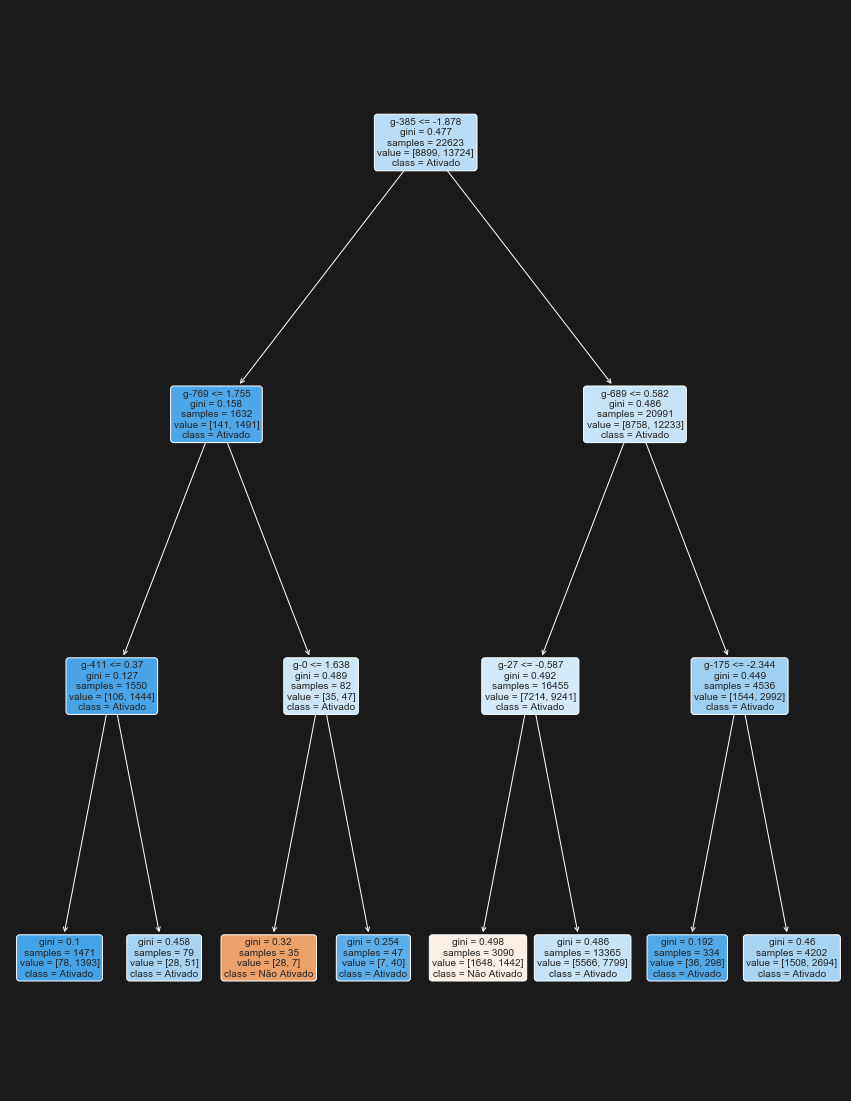

In [131]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15,20), facecolor='k')
tree.plot_tree(modelo_arvore, ax=ax, fontsize=10, rounded=True,
              filled=True, feature_names=x_treino.columns,
              class_names=['Não Ativado','Ativado'])
plt.show()

In [132]:
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.05, 
                                                        stratify=y, random_state=42)
teste = []
treino =[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

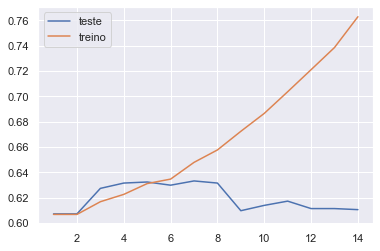

In [135]:
sns.lineplot(x=range(1,15), y=teste, label='teste')
sns.lineplot(x=range(1,15), y=treino, label='treino')

In [140]:
pd.get_dummies(dados_combinados, columns=['tratamento','tempo','dose'])

,id,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,Eh_24h,Eh_48h,Eh_72h,tratamento_com_controle,tratamento_com_droga,tempo_24,tempo_48,tempo_72,dose_D1,dose_D2
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,True,False,False,0,1,1,0,0,1,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,False,False,True,0,1,0,0,1,1,0
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,False,True,False,0,1,0,1,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,False,True,False,0,1,0,1,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,False,False,True,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,True,False,False,0,1,1,0,0,0,1
23810,id_fffb70c0c,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,True,False,False,0,1,1,0,0,0,1
23811,id_fffc1c3f4,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,False,True,False,1,0,0,1,0,0,1
23812,id_fffcb9e7c,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,True,False,False,0,1,1,0,0,1,0


In [141]:
from sklearn.ensemble import RandomForestClassifier

x = dados_combinados.drop(['id','n_moa','ativo_moa','droga'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','tempo','dose'])
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.05, 
                                                        stratify=y, random_state=42)

modelo_random_forest = RandomForestClassifier()
modelo_random_forest.fit(x_treino, y_treino)
modelo_random_forest.score(x_teste, y_teste)

0.6952141057934509